<h1>
Metropolis Modelling of the Ising Model
</h1>

<h1> Case 1 </h1>

**Investigating at an initial temperature of 1 Kelvin**

[[ 1  1  1  1  1]
 [-1  1 -1 -1  1]
 [ 1 -1  1 -1 -1]
 [-1  1 -1  1 -1]
 [-1  1  1 -1 -1]]
6


Text(0.5, 1.0, 'Initial Spin Configuration')

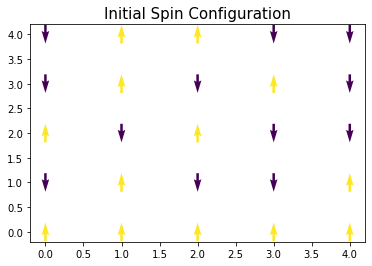

In [1]:
import numpy as np
from numpy.random import random, seed
import matplotlib.pyplot as plt

#initial size of lattice
L = 5

#function to create a random lattice of spins up or down

def atom_grid(L):
    lattice = np.random.randint(0,2,(L,L))
    lattice[lattice==0] = -1              #turning all zeros' in the matrix to -1
    return lattice

#printing the initial lattice
m = atom_grid(L)
print(m)

#calculate the total energy by taking sum of neighbouring spins
def total_energy(m,J):

    lattice_sum = []
    for i in range(len(m)):
        for j in range(len(m)):
            lattice1 = m[i,j]

            if (i+1)==len(m):
                neighbour_sum = m[0,j] + m[i,j] + m[i-1,j] + m[i,j-1]
                lattice_sum.append(neighbour_sum*lattice1)

            elif (j+1)==(len(m)):
                neighbour_sum = m[i,j] + m[i,0] + m[i-1,j] + m[i,j-1]
                lattice_sum.append(neighbour_sum*lattice1)

            elif (i-1)==-1:
                neighbour_sum = m[i+1,j] + m[i,j+1] + m[0,j] + m[i,j]
                lattice_sum.append(neighbour_sum*lattice1)

            elif (j-1)==-1:
                neighbour_sum = m[i+1,j] + m[i,j+1] + m[i-1,j] + m[i,0]
                lattice_sum.append(neighbour_sum*lattice1)

            else:
                neighbour_sum = m[i+1,j] + m[i,j+1] + m[i-1,j] + m[i,j-1]
                lattice_sum.append(neighbour_sum*lattice1)

    return  -J*np.sum(lattice_sum)

#prints total energy
print(total_energy(m,1))

#visual representation of inital spin configuration
plt.quiver(m*0,m,m, pivot="middle")
plt.title("Initial Spin Configuration",fontsize=15)

Magnetisation = 25.00


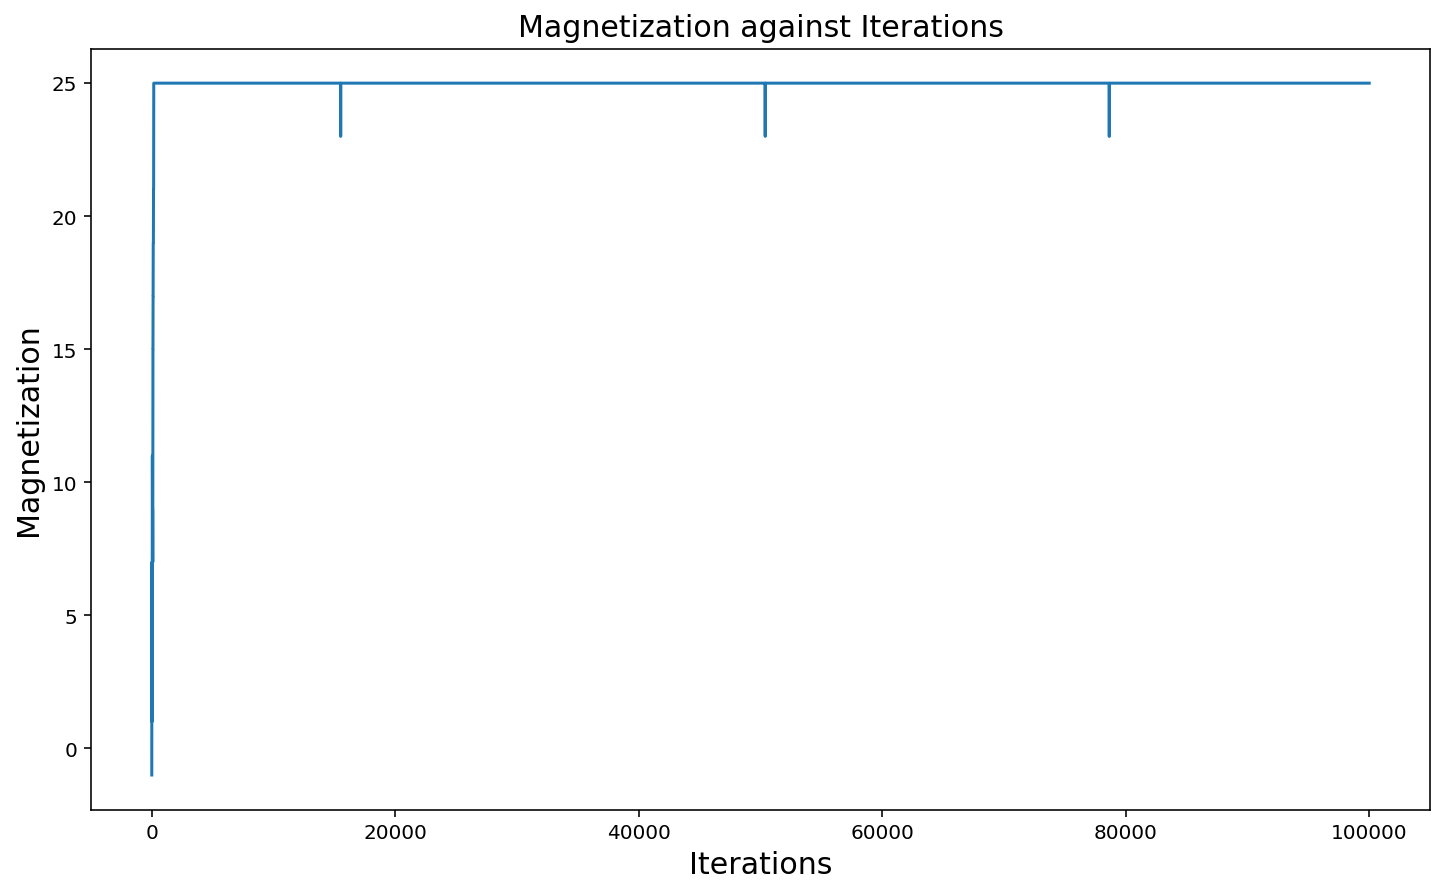

In [2]:
nsteps = 100000
seed(1)
beta = 1

#initial parameters
current_Kb = 1
current_T = 1
current_J = 1

#Magnetisation
Magnetisation = [m.sum()]

#Markov Chain Monte Carlo method
for i in range(nsteps):

    #Initial Energy
    Initial_Energy = total_energy(m,current_J)

    #picking a random row and column
    random_row = np.random.randint(0,len(m))
    random_column = np.random.randint(0,len(m))

    #isolated spin
    sliced_lattice = m[random_row,random_column]

    #changing spin
    if sliced_lattice==1:
        sliced_lattice = -1
    elif sliced_lattice==-1:
        sliced_lattice = 1

    m[random_row,random_column] = sliced_lattice

    New_Energy = total_energy(m,current_J)

    Delta_Energy = New_Energy - Initial_Energy

    #accepting the move if conditions are met
    if random() < np.exp(-Delta_Energy/(current_Kb*current_T)):
        Initial_Energy = New_Energy
    else:
        m[random_row,random_column] = -sliced_lattice

    EM = m.sum()
    Magnetisation.append(EM)

#burn-in and posterior plot
plt.plot(Magnetisation)
plt.xlabel('Iterations', fontsize=15)
plt.ylabel('Magnetization', fontsize=15)
plt.title('Magnetization against Iterations',fontsize=15)
print(f"Magnetisation = {np.average(Magnetisation[20000:]):.2f}")

Text(0.5, 1.0, 'Spin Configuration after MCMC')

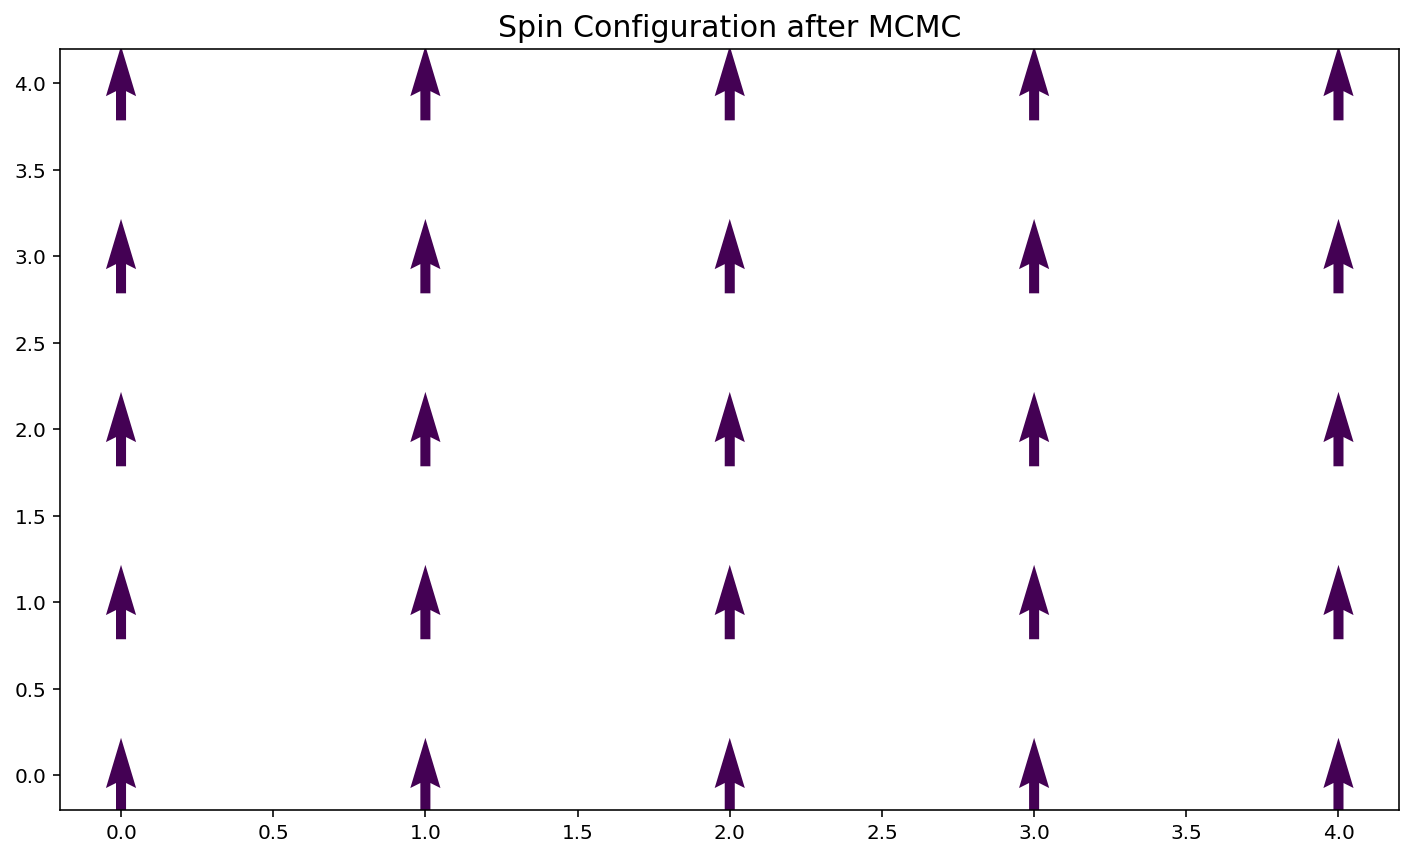

In [3]:
#spin configuration after MCMC
plt.quiver(m*0,m,m, pivot="middle")
plt.title("Spin Configuration after MCMC",fontsize=15)

<h1> Case 2 </h1>

**This is the exact same code as above but with investigating instead for a temperature of 20 Kelvin**

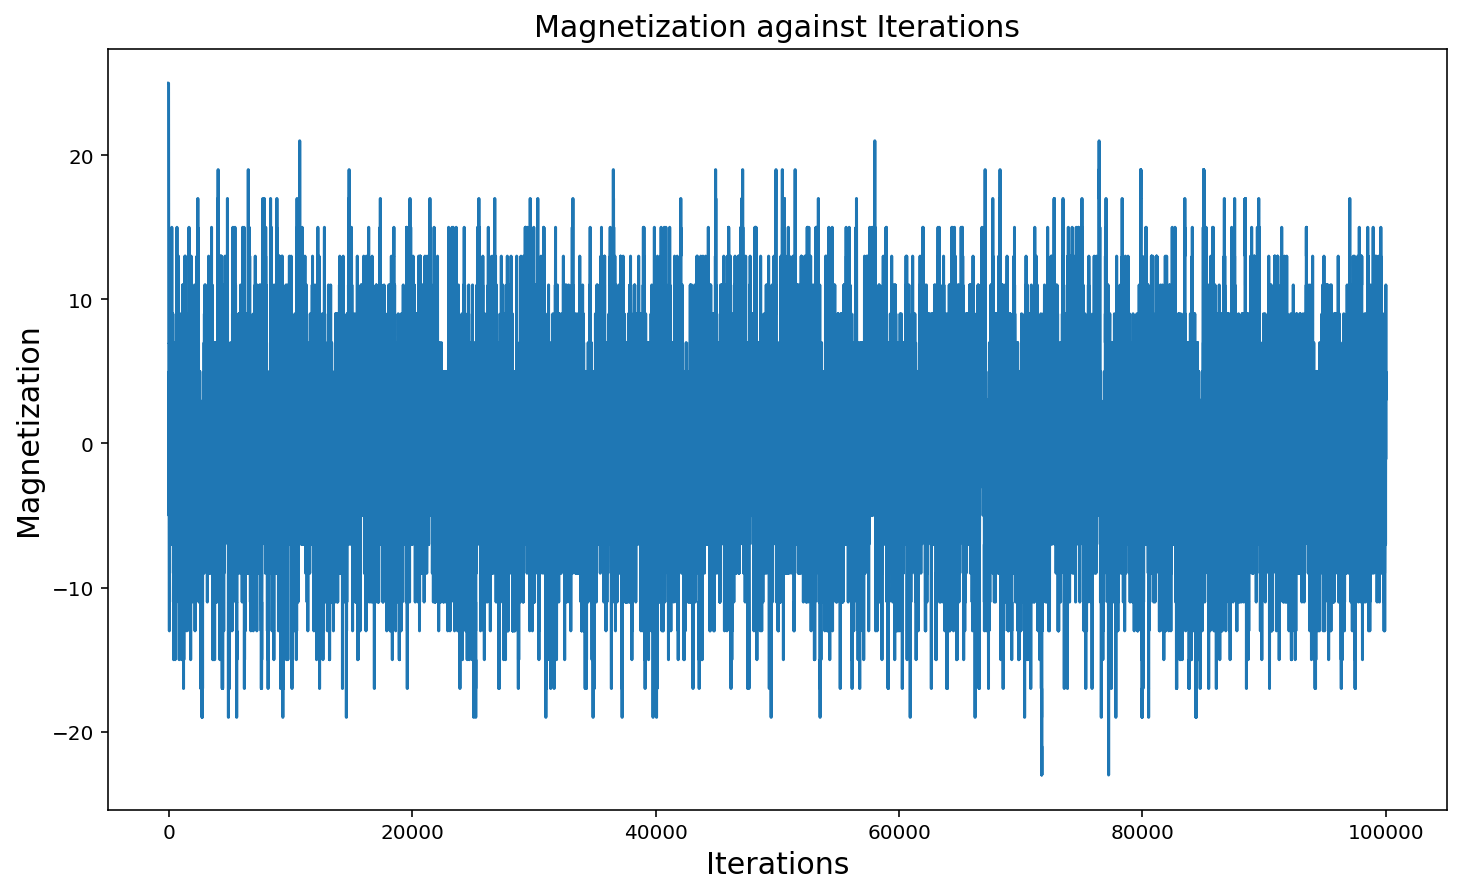

Text(0.5, 1.0, 'Spin Configuration after MCMC')

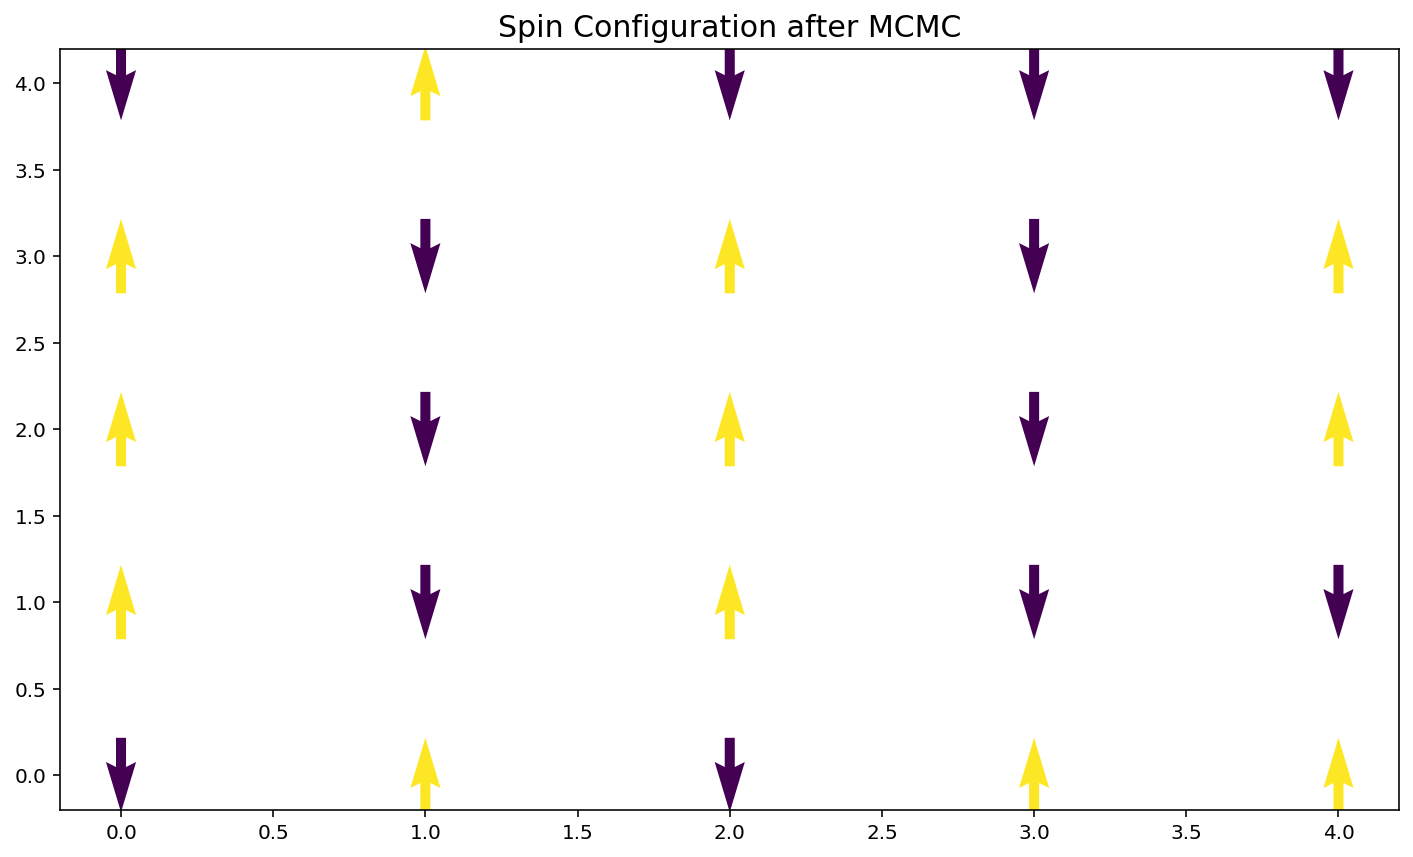

In [4]:
import numpy as np
from numpy.random import random, seed
import matplotlib.pyplot as plt

#initial size of lattice
L = 5

#function to create a random lattice of spins up or down

def atom_grid(L):
    lattice = np.random.randint(0,2,(L,L))
    lattice[lattice==0] = -1              #turning all zeros' in the matrix to -1
    return lattice

#calculate the total energy by taking sum of neighbouring spins
def total_energy(m,J):

    lattice_sum = []
    for i in range(len(m)):
        for j in range(len(m)):
            lattice1 = m[i,j]

            if (i+1)==len(m):
                neighbour_sum = m[0,j] + m[i,j] + m[i-1,j] + m[i,j-1]
                lattice_sum.append(neighbour_sum*lattice1)

            elif (j+1)==(len(m)):
                neighbour_sum = m[i,j] + m[i,0] + m[i-1,j] + m[i,j-1]
                lattice_sum.append(neighbour_sum*lattice1)

            elif (i-1)==-1:
                neighbour_sum = m[i+1,j] + m[i,j+1] + m[0,j] + m[i,j]
                lattice_sum.append(neighbour_sum*lattice1)

            elif (j-1)==-1:
                neighbour_sum = m[i+1,j] + m[i,j+1] + m[i-1,j] + m[i,0]
                lattice_sum.append(neighbour_sum*lattice1)

            else:
                neighbour_sum = m[i+1,j] + m[i,j+1] + m[i-1,j] + m[i,j-1]
                lattice_sum.append(neighbour_sum*lattice1)

    return  -J*np.sum(lattice_sum)

nsteps = 100000
seed(1)
beta = 1

#initial parameters
current_Kb = 1
current_T = 20
current_J = 1

#Magnetization
Magnetisation = [m.sum()]

#Markov Chain Monte Carlo method
for i in range(nsteps):

    #Initial Energy
    Initial_Energy = total_energy(m,current_J)

    #picking a random row and column
    random_row = np.random.randint(0,len(m))
    random_column = np.random.randint(0,len(m))

    #isolated spin
    sliced_lattice = m[random_row,random_column]

    #changing spin
    if sliced_lattice==1:
        sliced_lattice = -1
    elif sliced_lattice==-1:
        sliced_lattice = 1

    m[random_row,random_column] = sliced_lattice

    New_Energy = total_energy(m,current_J)

    Delta_Energy = New_Energy - Initial_Energy

    #accepting the move if conditions are met
    if random() < np.exp(-Delta_Energy/(current_Kb*current_T)):
        Initial_Energy = New_Energy
    else:
        m[random_row,random_column] = -sliced_lattice

    EM = m.sum()
    Magnetisation.append(EM)

#burn-in and posterior plot
plt.plot(Magnetisation)
plt.xlabel('Iterations', fontsize=15)
plt.ylabel('Magnetization', fontsize=15)
plt.title('Magnetization against Iterations',fontsize=15)

#spin configuration after MCMC
plt.show()
plt.quiver(m*0,m,m, pivot="middle")
plt.title("Spin Configuration after MCMC",fontsize=15)

<h1>
    Case 3
</h1>

**Plot of Equilibrated Magnetization as a function of Temperature, that is the magnetization for a range of different temperatures**

In [5]:
import numpy as np
from numpy.random import random, seed
import matplotlib.pyplot as plt

#initial size of lattice
L = 5

#function to create a random lattice of spins up or down

def atom_grid(L):
    lattice = np.random.randint(0,2,(L,L))
    lattice[lattice==0] = -1              #turning all zeros' in the matrix to -1
    return lattice

#calculate the total energy by taking sum of neighbouring spins
def total_energy(m,J):

    lattice_sum = []
    for i in range(len(m)):
        for j in range(len(m)):
            lattice1 = m[i,j]

            if (i+1)==len(m):
                neighbour_sum = m[0,j] + m[i,j] + m[i-1,j] + m[i,j-1]
                lattice_sum.append(neighbour_sum*lattice1)

            elif (j+1)==(len(m)):
                neighbour_sum = m[i,j] + m[i,0] + m[i-1,j] + m[i,j-1]
                lattice_sum.append(neighbour_sum*lattice1)

            elif (i-1)==-1:
                neighbour_sum = m[i+1,j] + m[i,j+1] + m[0,j] + m[i,j]
                lattice_sum.append(neighbour_sum*lattice1)

            elif (j-1)==-1:
                neighbour_sum = m[i+1,j] + m[i,j+1] + m[i-1,j] + m[i,0]
                lattice_sum.append(neighbour_sum*lattice1)

            else:
                neighbour_sum = m[i+1,j] + m[i,j+1] + m[i-1,j] + m[i,j-1]
                lattice_sum.append(neighbour_sum*lattice1)

    return  -J*np.sum(lattice_sum)

In [6]:
nsteps = 100000
seed(1)
beta = 1

Average_Mag = []
Tempvals = []

#Initial Parameters
current_Kb = 1
current_J = 1

Magnetisation = [m.sum()]

#Perfoming MCMC for a range of different temperature values
for j in range(1,11):
    current_T = j
    for i in range(nsteps):

        Initial_Energy = total_energy(m,current_J)

        random_row = np.random.randint(0,len(m))
        random_column = np.random.randint(0,len(m))

        sliced_lattice = m[random_row,random_column]

        if sliced_lattice==1:
            sliced_lattice = -1
        elif sliced_lattice==-1:
            sliced_lattice = 1

        m[random_row,random_column] = sliced_lattice

        New_Energy = total_energy(m,current_J)

        Delta_Energy = New_Energy - Initial_Energy


        if random() < np.exp(-Delta_Energy/(current_Kb*current_T)):
            Initial_Energy = New_Energy
        else:
            m[random_row,random_column] = -sliced_lattice

        EM = m.sum()
        Magnetisation.append(EM)

    #to change all values of Magnetisation to positive for convinenece
    Avg = np.average(Magnetisation[20000:])
    if Avg>0:
        Average_Mag.append(Avg)
    else:
        Average_Mag.append(-Avg)
    Tempvals.append(current_T)

Text(0.5, 1.0, 'Equilibrated Magnetization as Function of Temperature')

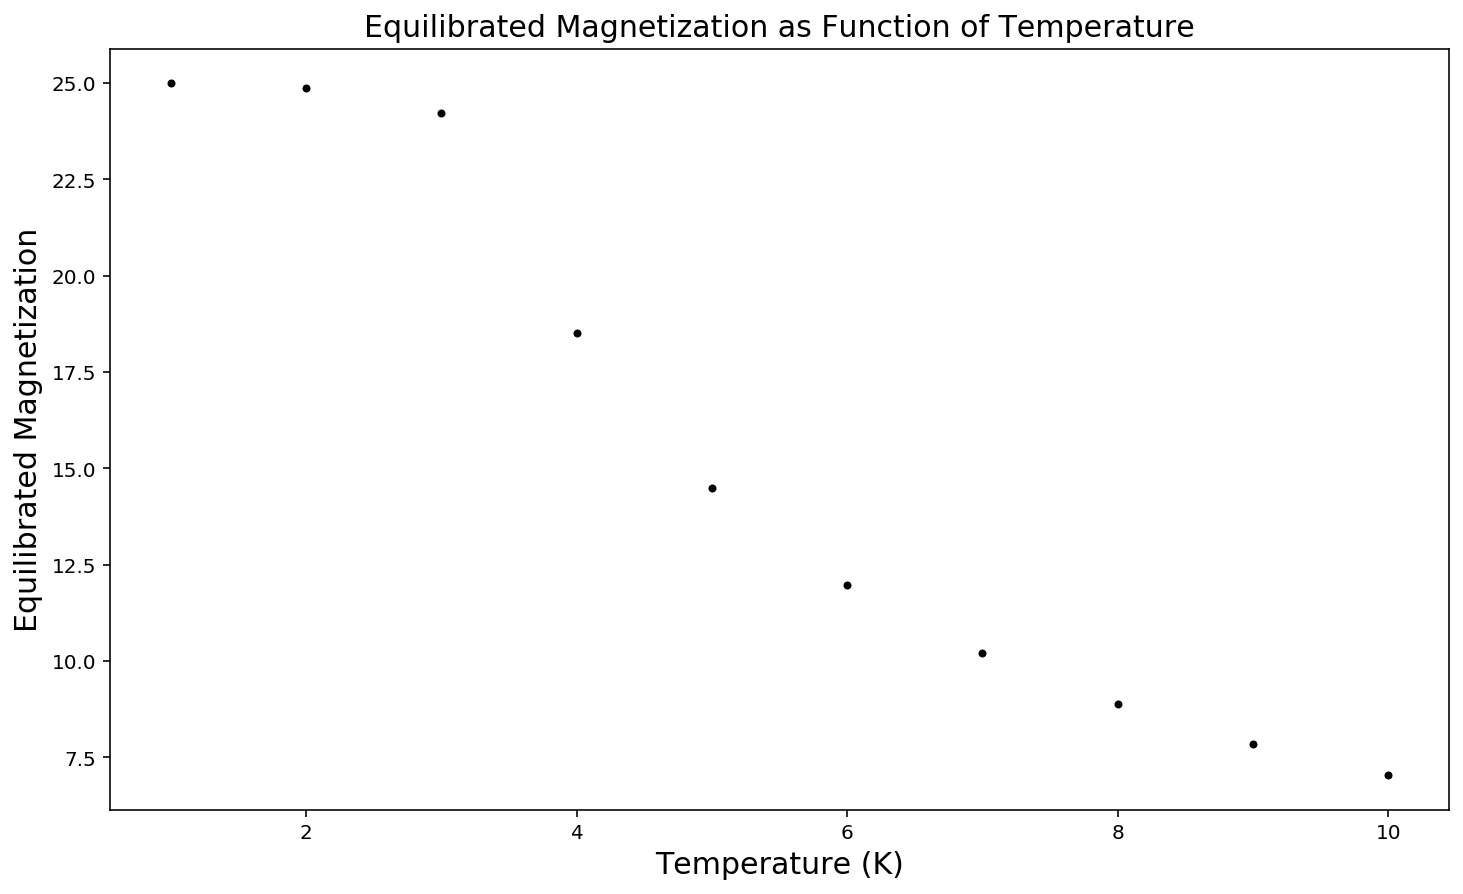

In [7]:
#plot of equilibrated magnetization as a function of temperature
plt.plot(Tempvals,Average_Mag,'k.')
plt.xlabel('Temperature (K)', fontsize=15)
plt.ylabel('Equilibrated Magnetization', fontsize=15)
plt.title('Equilibrated Magnetization as Function of Temperature',fontsize=15)